# **_<font color='red'>Consegna prova in itinere</font>_** 
#### Gruppo _Arena_ (544907), _Bergonzini_ (560680), _Biondi_ (547237), _Ricca_ (641031)

## Indice:
- [Introduzione](#intro)
    - [Sezione statistica descrittiva](#statistica)
    - [Grafico 1 : Rapporto uomini-donne all'interno dell'azienda](#G1)
    - [Grafico 2 : Rapporto etnie](#G2)
- [Sezione 1: Piattaforme di assunzione](#piattaforme)
    - [Grafico 3 : Percentuali piattaforme di assunzione](#G3)
    - [Grafico 4 : Rapporto tra il Performance Score e la piattaforma di recruiting](#G4)
    - [Grafico 5 : Rapporto tra piattaforma di recruiting e eta' al momento dell'assunzione](#G5)
    - [Grafico 6 : Rapporto tra dipendenti per ogni dipartimento e piattaforma di assunzione](#G6)
- [Sezione 2: Salario](#salario)
    - [Grafico 7 : Relazione tra la posizione lavorativa e il guadagno medio](#G7)
    - [Grafico 8 : Comparazione tra salario medio e dipartimento](#G8)
    - [Grafico 9 : Relazione tra salario, dipartimento e numero di progetti speciali](#G9)
    - [Grafico 10 : Confronto tra dipartimento, sesso e salario ](#G10)
    - [Grafico 11 : Rapporto tra assunzione tramite diversity job fair e salario](#G11)
    - [Grafico 12 : Rapporto tra salario, assenze e progetti speciali in base all'età dell'impiegato](#G12)
- [Sezione 3: Correlazioni](#correlazioni)
    - [Grafico 13 : Pairplot](#G13)
    - [Grafico 14 : Correlazione tra eta' e salario](#G14)
    - [Grafico 15 : Heatmap](#G15)
        - [Grafico 15.1 : Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del primo gruppo](#G15.1)
        - [Grafico 15.2 : Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del secondo gruppo](#G15.2)
        - [Grafico 15.3 : Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager dell'area vendite](#G15.3)
        - [Grafico 15.4 : Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager di produzione](#G15.4)
        - [Grafico 15.5 : Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario degli ingegneri software](#G15.5)
    - [Quartili e Outliers](#quartili)
    - [Calcolo di indici Skweness e Kurtosis](#kurtosis)
    - [Indici di correlazione di Pearson, Spearman, Kendall](#corr2)
- [Sezione 4: Altro-Extra](#extra)
    - [Grafico 16 : Rapporto tra assenze e stato civile](#G16)
    - [Grafico 17 : Numero di assenze specifiche per uomini e donne, per ogni dipartimento](#G17)
    - [Grafico 18 : Rapporto tra motivazione della fine del contratto ed eta'](#G18)
- [Sezione Gestione dei NaN](#nan)
- [Conclusioni](#conclusioni)
- [Changelog](#changelog)


### **_<a id='intro'></a><font color='orange'>Introduzione</font>_**

Con il seguente studio il nostro gruppo si è posto come obiettivo svolgere uno studio di tipo __qualitativo__ sul dataset HR14. In particolare, l'approccio scelto è di tipo top-down.

Come si vedrà in seguito, questo tipo di approccio ci conduce da un tipo di grafico meramente quantitativo a grafici di analisi qualitativa. Abbiamo iniziato lo studio partendo da una sezione dedicata ad alcuni calcoli statistico-descrittivi e alcuni grafici generici sul dataset. Successivamente abbiamo diviso lo studio in tre macro aree: la prima sulle piattaforme di recruiting, la seconda sull'apporto salariale degli impiegati, la terza sulle correlazioni presenti nel dataset, più una sezione extra con alcuni grafici aggiuntivi. Nella sezione riguardante le correlazioni, oltre ai grafici, è presente un'analisi sull'andamento delle distrubizoni. 



Infine alcune considerazioni conclusive sul lavoro svolto.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as sp
from scipy.stats import trim_mean, kurtosis
from scipy import stats
from scipy.stats.mstats import gmean, hmean
from datetime import datetime, date
from plotly.offline import iplot, init_notebook_mode
import plotly.express as py
import plotly as px
import cufflinks as cf
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv("HRDataset_v14.csv")
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go


In [89]:
#funzione per calcolare e creare una nuova colonna Age contenente l'età attuale degli impiegati
def age(born):
	born = datetime.strptime(born, "%m/%d/%y").date()
	today = date.today()
	if born.year > today.year:
		return today.year - (born.year - 100)
	else:
		return today.year - born.year
df['Age'] = df['DOB'].apply(age)

In [90]:
#La nuova colonna AgeofHire contiene l'età degli impiegati al momento dell'assunzione
yearHire = pd.DatetimeIndex(df['DateofHire']).year
today = date.today()
x = today.year-yearHire
diff=df['Age']-x
df['AgeofHire']=diff


In [91]:
#la nuova colonna "AgeTerm" contiene l'età degli impiegati al momento del licenziamento
yearTerm = pd.DatetimeIndex(df["DateofTermination"]).year 
df["AgeTerm"] = df["Age"] - (date.today().year-yearTerm)

In [92]:
df_onlyworking = df.drop(df[(df.TermReason != 'N/A-StillEmployed')].index)
df_noworking = df.drop(df[(df.TermReason == 'N/A-StillEmployed')].index)
dfNum= df[["Salary", "Age", "EmpSatisfaction", "EngagementSurvey", "Absences", "DaysLateLast30", "SpecialProjectsCount", "AgeTerm", "AgeofHire"]]

### **_<a id="statistica"></a><font color='orange'>Sezione Statistica descrittiva</font>_**

Di seguito una tabella che mostra i dati statistici (media, deviazione standard, quartili, massimo e minimo) delle colonne del dataset che presentano dati numerici.

In [93]:
dfNum.describe().round(2)

,Salary,Age,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,SpecialProjectsCount,AgeTerm,AgeofHire
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,104.00,311.00
mean,69020.68,43.41,3.89,4.11,10.24,0.41,1.22,37.65,34.10
std,25156.64,8.87,0.91,0.79,5.85,1.29,2.35,9.88,8.91
min,45046.00,30.00,1.00,1.12,1.00,0.00,0.00,23.00,19.00
25%,55501.50,36.00,3.00,3.69,5.00,0.00,0.00,29.75,28.00
50%,62810.00,42.00,4.00,4.28,10.00,0.00,0.00,35.50,32.00
75%,72036.00,49.00,5.00,4.70,15.00,0.00,0.00,43.25,39.00
max,250000.00,71.00,5.00,5.00,20.00,6.00,8.00,64.00,63.00


La seguente tabella mostra la mediana di ciascuna colonna con valori numerici.

In [94]:
dfNum.median().round(2)

Salary                  62810.00
Age                        42.00
EmpSatisfaction             4.00
EngagementSurvey            4.28
Absences                   10.00
DaysLateLast30              0.00
SpecialProjectsCount        0.00
AgeTerm                    35.50
AgeofHire                  32.00
dtype: float64

Di seguito invece, in ordine, i dati dei primi cinque dipendenti con stipendio maggiore e successiamente dei cinque impiegati più anziani.

In [95]:
df.style
df.nlargest(5,"Salary")



,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,AgeofHire,AgeTerm
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,0,16,President & CEO,MA,1902,09/21/54,F,Married,US Citizen,Yes,White,7/2/2012,NaN,N/A-StillEmployed,Active,Executive Office,Board of Directors,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,68,58,NaN
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,43,31,NaN
131,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,0,11,Director of Sales,RI,2908,03/17/66,F,Married,US Citizen,No,White,5/5/2014,NaN,N/A-StillEmployed,Active,Sales,Janet King,2.0,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19,56,48,NaN
96,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,0,12,IT Director,MA,1460,07/05/80,M,Single,US Citizen,No,Black or African American,4/15/2011,NaN,N/A-StillEmployed,Active,IT/IS,Jennifer Zamora,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15,42,31,NaN
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,0,10,Director of Operations,MA,2030,03/19/83,M,Single,US Citizen,No,Black or African American,1/5/2009,NaN,N/A-StillEmployed,Active,Production,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15,39,26,NaN


In [96]:
df.style
df_onlyworking.nlargest(5,"Age")




,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age,AgeofHire,AgeTerm
41,"Chace, Beatrice",10067,0,0,0,1,5,3,0,61656,0,19,Production Technician I,MA,2763,01/02/51,F,Single,US Citizen,No,White,9/29/2014,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,Google Search,Fully Meets,5.00,4,0,2/12/2019,0,11,71,63,NaN
61,"Daniele, Ann",10212,1,1,0,3,3,3,0,85028,0,28,Sr. Network Engineer,CT,6033,01/18/52,F,Married,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,3.10,5,8,2/12/2019,0,19,70,62,NaN
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,0,16,President & CEO,MA,1902,09/21/54,F,Married,US Citizen,Yes,White,7/2/2012,NaN,N/A-StillEmployed,Active,Executive Office,Board of Directors,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,68,58,NaN
230,"Ren, Kylo",10140,1,1,1,1,6,3,0,61809,0,3,Area Sales Manager,ID,83706,10/12/54,M,Married,US Citizen,No,White,5/12/2014,NaN,N/A-StillEmployed,Active,Sales,John Smith,17.0,CareerBuilder,Fully Meets,3.98,3,0,1/28/2019,0,4,68,60,NaN
21,"Biden, Lowan M",10226,0,2,0,1,5,3,0,64919,0,19,Production Technician I,MA,2027,12/27/58,F,Divorced,US Citizen,No,Asian,8/19/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Indeed,Fully Meets,4.20,3,0,1/10/2019,0,2,64,55,NaN


Per concludere la sezione sulla statistisca descrittiva riportiamo una tabella mostrante lo ZScore di ogni record dei valori numerici del dataset.

$Z=\frac{x-\overline{x}}{s}$

Lo ZScore mostra il valore della deviazione standard, superiore o inferiore alla media: più è vicino allo 0, più il valore si avvicina alla media.

In [97]:
dfZ = dfNum.apply(sp.zscore).round(2)
dfZ.drop(columns=['AgeTerm'],inplace = True )
dfZ.style
dfZ.head(5)

,Salary,Age,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,SpecialProjectsCount,AgeofHire
0,-0.26,-0.50,1.22,0.62,-1.58,-0.32,-0.52,-0.69
1,1.41,0.41,-0.98,1.08,1.16,-0.32,2.04,0.66
2,-0.16,-1.06,-0.98,-1.38,-1.24,-0.32,-0.52,-1.25
3,-0.16,-1.06,1.22,0.93,0.81,-0.32,-0.52,-1.58
4,-0.72,-1.18,0.12,1.13,-1.41,-0.32,-0.52,-1.36


#### **_<a id='G1'></a><font color='gold'>Grafico 1: Rapporto uomini-donne all'interno dell'azienda</font>_** 
Nel grafico viene analizzato il rapporto tra dipendenti di genere maschile e dipendenti di genere femminile; si evince una leggera maggioranza femminile all'interno del personale. 


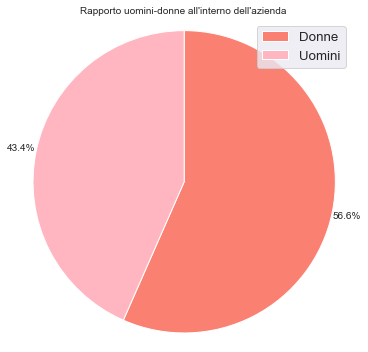

In [98]:
genere=df["Sex"].value_counts()
fig = plt.gcf()
fig.set_size_inches(5,5) 
plt.pie(genere,counterclock=False, shadow=False,autopct='%1.1f%%', pctdistance=1.10, startangle=90, colors = ['salmon', 'lightpink'])
plt.title("Rapporto uomini-donne all'interno dell'azienda")
etichette=["Donne", "Uomini" ]
plt.legend(labels=etichette, loc="best")
plt.tight_layout()
plt.axis('equal')
plt.show()

#### **_<a id='G2'></a><font color='gold'>Grafico 2: Rapporto etnie</font>_**
Il seguente grafico analizza il rapporto tra le differenti etnie. 
Mentre la maggior parte degli impiegati è di etnia caucasica, notiamo come persone di colore e afroamericani ed asiatici rappresentino le altre due grandi maggioranze etniche presenti; il restante 4.8% è occupato da (in ordine): due o più etnie, nativi americani e ispanici. 

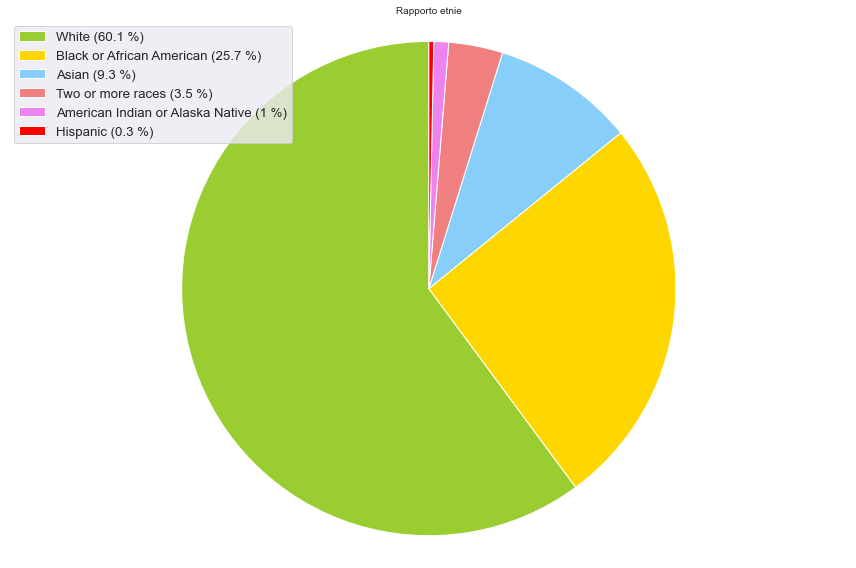

In [99]:
labels = [r'White (60.1 %)', r'Black or African American (25.7 %)', 
r'Asian (9.3 %)', r'Two or more races (3.5 %)', r'American Indian or Alaska Native (1 %)', r'Hispanic (0.3 %)']
sizes = df["RaceDesc"].value_counts()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'violet', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
fig.set_size_inches(5,5)
plt.axis('equal')
plt.title('Rapporto etnie')
plt.tight_layout()
plt.show()

---

### **_<a id="piattaforme"></a><font color='orange'>Sezione Piattaforme di assunzione</font>_**
Nella segeunte sezione ci siamo impegnati ad analizzare nello specifico come la piattaforma di recruiting, dalla quale gli impiegati sono stati selezionati, potesse influire nella vita lavorativa degli stessi, partendo dalle semplici percentuali di assunzione (Grafico 3).
Abbiamo cercato di rispondere a domande quali l'esistenza di una relazione tra l'assunzione tramite queste piattaforme e le *prestazioni* dei singoli dipendenti, *l'età al momento dell'assunzione* o il *dipartimento* di appartenenza. 




#### **_<a id='G3'></a><font color='gold'>Grafico 3: Percentuali piattaforme di assunzione</font>_**
Il seguente grafico analizza il rapporto tra le differenti piattaforme di assunzione, attraverso le quali gli impiegati sono stati assunti all'interno dell'azienda.
Seppure la maggioranza degli impiegati venga dalle piattaforme web-social (LinkedIn - Indeed) e oltre l'80% degli stessi sia stato assunto attraverso canali online; è altresì interessante notare come ben il 10% degli impiegati sia stato assunto *analogicamente*  su consiglio di lavoratori già presenti. Nota di merito per il programma di *diversity job fair* il quale prevede assunzioni (9.3%) per persone appartenenti a categorie protette, con disabilità e di origine straniera. 

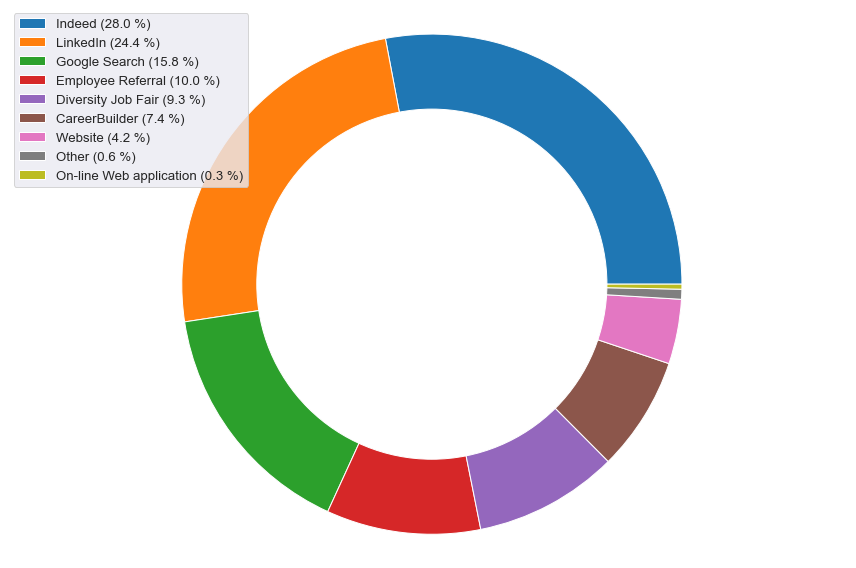

In [100]:
piattaforma=df["RecruitmentSource"].value_counts()
plt.pie(piattaforma)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
etichette_lavoro = [r'Indeed (28.0 %)', r'LinkedIn (24.4 %)',r'Google Search (15.8 %)', r'Employee Referral (10.0 %)', r'Diversity Job Fair (9.3 %)', r'CareerBuilder (7.4 %)',r'Website (4.2 %)',r'Other (0.6 %)',r'On-line Web application (0.3 %)', ]
plt.legend(labels=etichette_lavoro, loc="upper left")
plt.tight_layout()
plt.axis('equal')
plt.show()


#### **_<a id='G4'></a><font color='gold'>Grafico 4: Rapporto tra il Performance Score e la piattaforma di recruiting</font>_**
Questo grafico analizza il rapporto tra le differenti piattaforme di assunzione e il *performance score* medio.
Si evince come il punteggio si attesti in valori compresi tra 2.5 e 3.0 con i soli impiegati derivanti da dall' *employee referral* che superano questa media. 

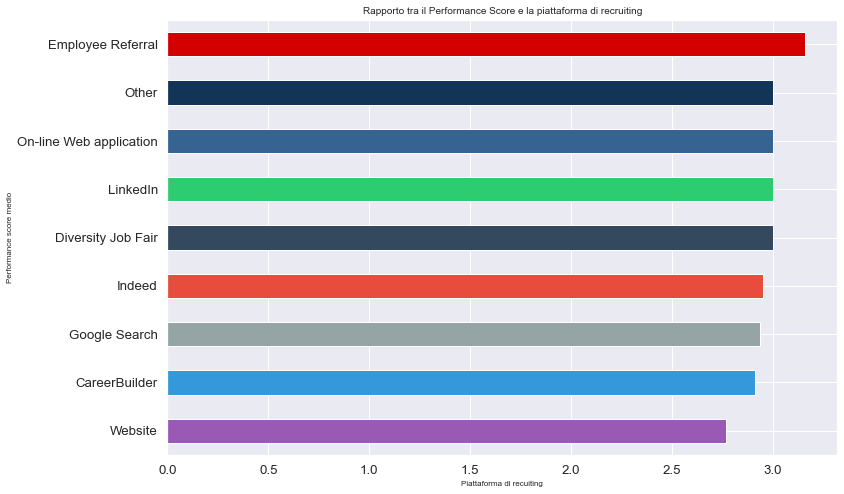

In [101]:
prestazione = df[["Employee_Name","PerfScoreID","RecruitmentSource"]]
gb=prestazione.groupby("RecruitmentSource")["PerfScoreID"]
df2=gb.mean()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#356492", "#123456", "#d40000"]
df2= df2.sort_values( ascending=True)
df2.plot(kind="barh", color=flatui)
plt.title("Rapporto tra il Performance Score e la piattaforma di recruiting")
plt.xlabel("Piattaforma di recuiting")
plt.ylabel("Performance score medio");

#### **_<a id='G5'></a><font color='gold'>Grafico 5: Rapporto tra piattaforma di recruiting e eta' al momento dell'assunzione</font>_**
In questo boxpolot analiziamo il rapporto tra l'età media di assunzione e la piattaforma di recruiting. Abbiamo voluto mettere in mostra l'età dei dipendenti provenienti da ogni piattaforma lavorarativa. Molto interessanti sono le piattaforme *Google Search* e *Online Web Application* i cui dati, a differenza delle altre scatole, sono asimmetrici con la linea di mediana leggermente scostata dal centro. Ancora, mentre in *Google Search* possiamo osservare ben 3 outliers, è altrettanto interessante notare come l'*Online Web Application* e la categoria *Others* abbiano praticamente un IQR pari a 0. 

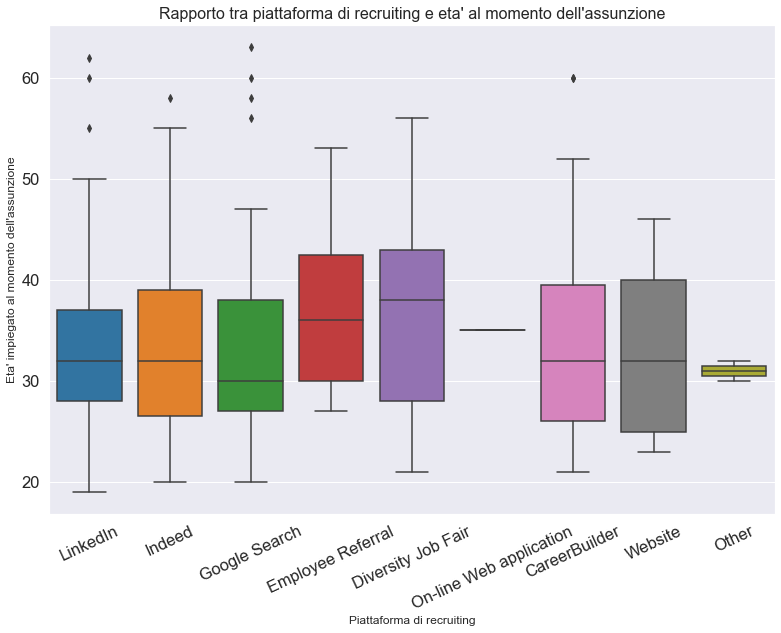

In [102]:
plt.figure(figsize=(13,9))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x='RecruitmentSource', y = 'AgeofHire', data=df)
plt.title("Rapporto tra piattaforma di recruiting e eta' al momento dell'assunzione")
plt.xlabel("Piattaforma di recruiting")
plt.ylabel("Eta' impiegato al momento dell'assunzione")
plt.xticks(rotation=25)
plt.show()

Piattaforma di recruiting | Numero di impiegati
:---------------|------:
Indeed|87
LinkedIn|76
Google Search|49
Employee Referral|31
Diversity Job Fair|29
CareerBuilder|23
Website|13
Other|2
On-line Web application|1

#### **_<a id='G6'></a><font color='gold'>Grafico 6: Rapporto tra dipendenti per ogni dipartimento e piattaforma di assunzione</font>_**
Nel seguente grafico abbiamo messo in relazione i dati provenienti dal *dipartimento* e dalla *piattaforma di recruiting*. 
E' stata creata una crosstab per calcolare il numero di persone provenienti da un determinato dipartimento, le quali sono state assunte tramite le varie piattaforme. 
Il dipartimento con il più alto numero di persone è quello della *production*, con il maggior numero di dipendenti assunto via LinkedIn.
Inoltre nel dipartimento Executive Office l'unico picco, proveniente da Indeed, è rappresentato dalla CEO dell'azienda. 


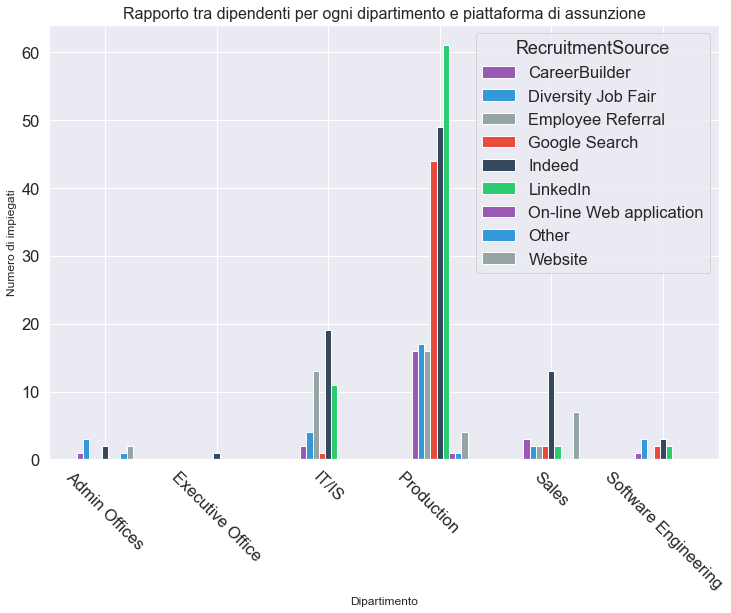

In [103]:
stackRec=pd.crosstab(df['Department'], df['RecruitmentSource'])
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.rcParams["figure.figsize"] = [12,8]
sns.set_style("darkgrid")
stackRec.plot(kind="bar", stacked=False,color=flatui)
plt.title('Rapporto tra dipendenti per ogni dipartimento e piattaforma di assunzione')
plt.ylabel('Numero di impiegati')
plt.xlabel('Dipartimento')
plt.xticks(rotation=-45)
plt.show()

---

### **_<a id="salario"></a><font color='orange'>Sezione Salario</font>_**
Qui ci occuperemo di indagare diversi aspetti riguardanti il contributo salariale degli impiegati, cercando di dimostrare se questo sia effettivamente legato alle singole *posizioni lavorative*, al *dipartimento*, al *sesso*, alla quantità di *progetti speciali* svolti e infine all'assunzione tramite progetti speciali come il *diversity job fair*. 


#### **_<a id='G7'></a><font color='gold'>Grafico 7: Relazione tra la posizione lavorativa e il guadagno medio</font>_**

Nel primo grafico della sezione si mostra la relazione tra la posizione lavorativa e il loro guadagno medio. Osserviamo come la maggior parte delle posizioni abbia un guadagno medio annuo inferiore ai 150000 dollari. Solo gli impiegati appartenenti alle prime sette categorie guadagnano annualmente più di questa cifra.

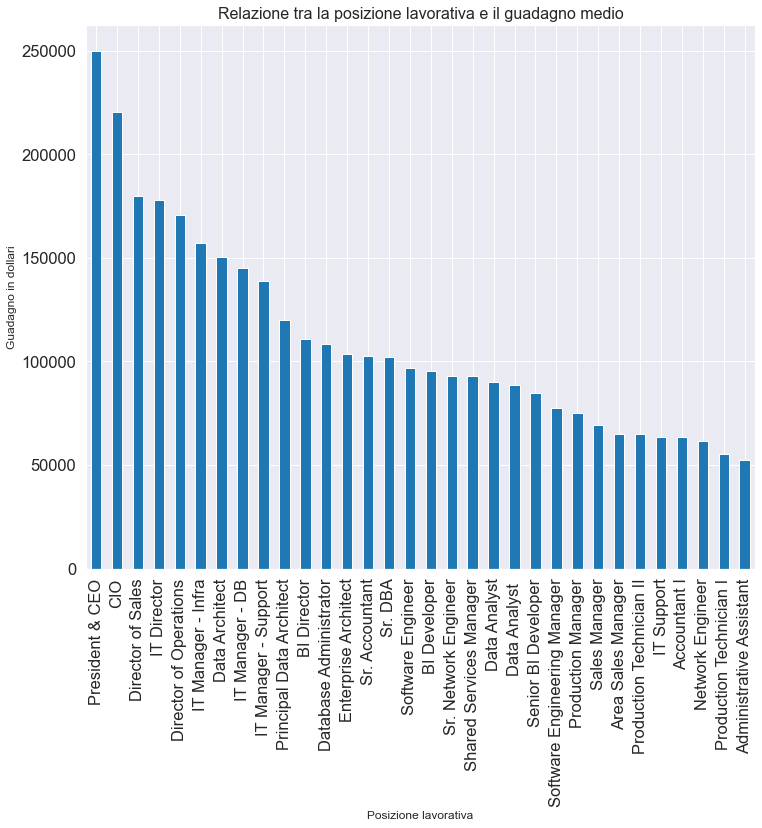

In [104]:
stipendio = df[["Salary","Position"]]
posizione=stipendio.groupby("Position")["Salary"]
posizionemedia=posizione.mean()
posizionemedia= posizionemedia.sort_values(ascending=False)
plt.rcParams["figure.figsize"]=[12,10]
posizionemedia.plot(kind="bar")
plt.title("Relazione tra la posizione lavorativa e il guadagno medio")
plt.xlabel("Posizione lavorativa")
plt.ylabel("Guadagno in dollari");

#### **_<a id='G8'></a><font color='gold'>Grafico 8: Comparazione tra salario medio e dipartimento</font>_**
In questo pointplot mettiamo in relazione il *salario* medio con il *dipartimento* degli impiegati, rispetto al numero di membri di ognuno di quest'ultimo. Interessante osservare come vi sia una disparità di guadagno tra i dipartimenti con più impiegati rispetto al picco del lineplot raggiunto da una sola persona, ovvero dal CEO, a quota 250000 dollari. 

In [105]:
df_dep = df[['Salary', 'Department']]
xvalue = df_dep['Department'].value_counts().array
yvalue = df_dep['Salary'].groupby(df_dep['Department']).mean().sort_values().array
df_dep = py.line(df_dep, x = xvalue, y= yvalue , title="Comparazione tra salario medio e numero di persone per dipartimento", markers = True)
df_dep.update_layout(width = 900, height = 550,showlegend=True, xaxis_title='Numero di persone per dipartimento', yaxis_title='Salario medio', font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ), title_font_color="red")
df_dep.show()

#### **_<a id='G9'></a><font color='gold'>Grafico 9: Relazioni tra salario, dipartimento e numero di progetti speciali</font>_**
Dopo aver creato una crosstab tra il numero di *Special Projects*, i *Departmets* e il *Salary*, ed aver generato il grafico, notiamo come la maggior parte di progetti speciali vengano realizzati da persone impiegate nei campi dell'IT, dai programmatori software e dagli admin offices. Interessante che poche persone abbiano realizzato un solo progetto speciale ma che ogni dipartimento presenti qualcuno a non averne realizzati affatto. 

In [106]:
tab_incrociate=pd.crosstab(df["SpecialProjectsCount"],df["Department"],values = df['Salary'], aggfunc= np.average)
data=[]
for x in tab_incrociate.columns:
    data.append(go.Scatter(name=str(x), x=tab_incrociate.index, y=tab_incrociate[x],stackgroup='one'))
rel=go.Figure(data)
rel.update_layout(width=1100, height=800, title='Relazione tra salario, dipartimento e numero di progetti speciali',legend_title="Dipartimenti" , xaxis_title="Progetti speciali",
    yaxis_title="Salario", font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ), title_font_color="red", legend_title_font_color="green")
rel.show()

#### **_<a id='G10'></a><font color='gold'>Grafico 10: Confronto tra dipartimento, sesso e salario </font>_**
In questo grafico possiamo osservare il rapporto tra il *salario medio* e il *dipartimento* in relazione con il *sesso* degli impiegati. Non sono presenti impiegati di sesso maschile nella categoria "Executive Office". Inoltre il salario più alto, 250.000 dollari, è assegnato a quella categoria in quanto rappresenta quella in cui è presente unicamente la CEO, la quale è una donna. Per il resto dei dipartimenti lo stipendio medio sembra essere  abbastanza uniforme per entrambi i sessi.

In [107]:
demostack=pd.crosstab(df['Department'], df['Sex'],values=df['Salary'],aggfunc=np.average)
data2=[]
for x in demostack.columns:
    data2.append(go.Scatter(name=str(x), x=demostack.index, y=demostack[x],stackgroup='one'))
sala_dep=go.Figure(data2)
sala_dep.update_layout(width=900, height=600,title='Confronto tra dipartimento, sesso e salario', xaxis_title="Dipartimento",
    yaxis_title="Salario", font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ),title_font_color="red", legend_title="Genere", legend_title_font_color="green")
sala_dep.show()

#### **_<a id='G11'></a><font color='gold'>Grafico 11: Rapporto tra assunzione tramite diversity job fair e salario</font>_**

Il seguente boxplot mette in rapporto l'assunzione tramite il programma di *Diversity Job Fair* e il *salario*; osserviamo che la mediana presente nei due box è la medesima. Nonostante ciò, si osserva, tramite il baffo inferiore, che l'impiegato con il salario più basso assunto tramite questo programma ha comunque un salario maggiore rispetto all'impiegato non assunto tramite diversity job fair con il salario minore. Dagli outliers, osserviamo come la CEO non sia stata assunta tramite questo progetto. Solo due sono gli outliers relativi all'assuzione tramite il programma di diversity job fair.

<Figure size 1080x1080 with 0 Axes>

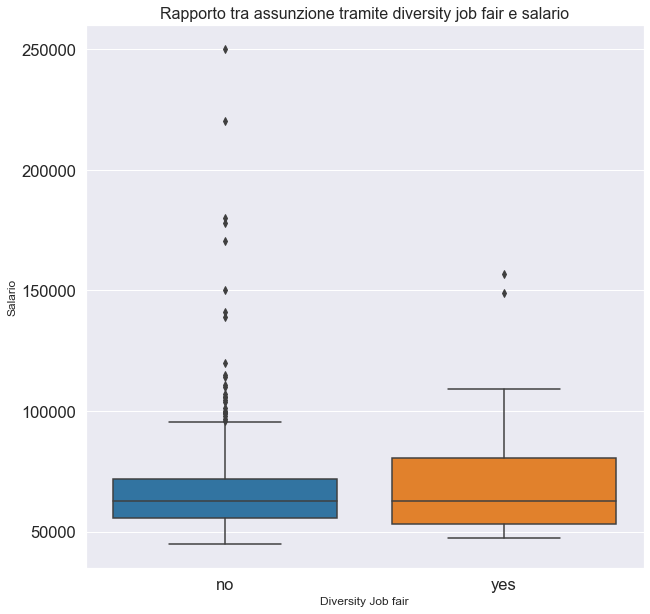

In [108]:
plt.figure(figsize=(15,15))
df["FromDiversityJobFairID"].replace({1: "yes", 0: "no"}, inplace=True)
plt.figure(figsize=(10,10))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x='FromDiversityJobFairID', y = 'Salary', data=df)
plt.title("Rapporto tra assunzione tramite diversity job fair e salario")
plt.xlabel("Diversity Job fair")
plt.ylabel("Salario")
plt.show()

Assunti attraverso il programma di *diversity job fair*?| Numero di impiegati
:---------------------|--------------:
No|282
Si|29

#### **_<a id='G12'></a><font color='gold'>Grafico 12: Rapporto tra salario, assenze e progetti speciali in base all'età dell'impiegato</font>_**

In questo grafico a bolle osserviamo il rapporto tra le variabili sopra citate. Ne emerge che la maggior parte dei dipendenti si posiziona ove il numero di progetti speciali è pari a 0, poichè appartenenti ai dipartamenti in cui questi non vengono svolti. Tra gli outlier relativi all'asse del salario spicca, come visto in precedenza, la CEO. 

In [109]:
fig = py.scatter_3d(df_onlyworking, x='Salary', y='SpecialProjectsCount', z='Absences', size='Age', color= "Age" )
fig.update_layout(width=1100, height=800, font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ), title = "Salario - Assenze - Progetti speciali in base all'età", scene = dict(xaxis=dict(title='Salario', titlefont_color='white'),yaxis=dict(title='Progetti speciali', titlefont_color='white'),zaxis=dict(title='Assenze', titlefont_color='white'),bgcolor = 'rgb(20, 24, 54)'), title_font_color="red", legend_title="Età dell'impiegato", legend_title_font_color="green")
fig.show()

---

### **_<a id = "correlazioni"></a><font color='orange'>Sezione Correlazioni</font>_**
Questa sezione si occupa di indagare se vi siano delle possibili correlazioni tra i dati presenti nel dataset, tramite i grafici e i calcoli degli indici di correlazione.



#### **_<a id='G13'></a><font color='gold'>Grafico 13: Pairplot</font>_**
Al fine di mettere in correlazione tutti i dati numerici presenti all'interno del dataset abbiamo utilizzato un pairplot. Abbiamo realizzato una griglia 7x7 in cui possiamo notare come non vi sia nessuna correlazione significativa tra le varie combinazioni di coppie possibili. 

In [110]:
fig = py.scatter_matrix(df,
dimensions=["Salary", "Age", "EmpSatisfaction", "EngagementSurvey", "Absences", "DaysLateLast30", "SpecialProjectsCount"])
fig.update_layout(
    title='Pairplot HR Dataset',
    dragmode='select',
    width=1100,
    height=1100,
    hovermode='closest',
    font=dict(
        color="RebeccaPurple"
    ),title_font_color="red"
)
fig.show()


#### **_<a id='G14'></a><font color='gold'>Grafico 14: Correlazione tra eta' e salario</font>_**
In questo scatterplot abbiamo messo in correlazione l'età  degli impiegati e lo stipendio. Si evince come non vi sia una correlazione tra le due variabili. Altresì è da riportare che gli impiegati presi in considerazione sono esclusivamente quelli che tutt'ora risultano attivi nell'organigramma aziendale. Si deduce che la maggior parte degli impiegati ha un salario che si colloca sotto una determinata soglia.

In [111]:
scatterlavoratori = py.scatter(df_onlyworking, x="Age",  y="Salary", color="Salary")
scatterlavoratori.update_layout(title= "Correlazione tra eta' e salario", xaxis_title="Età dell'impiegato",
    yaxis_title="Salario dell'impiegato", font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ),     title_font_color="red")
scatterlavoratori.show()

#### **_<a id='G15'></a><font color='gold'>Grafico 15: Heatmap</font>_**
Di seguito diverse heatmap per analizzare correlazioni all'interno del dataset; quella subito sotto confronta tutte le variabili.

In [112]:
x=dfNum.corr()
x.iplot(kind = 'heatmap', colorscale='spectral', title='Heatmap delle variabili numeriche' )

##### **_<a id='G15.1'></a><font color='gold'>Grafico 15.1 : correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del primo gruppo</font>_**
Per verificare la correlazione fra coppie di variabili in base alle posizioni specifiche del personale sono state realizzate alcune heatmap prendendo in considerazione le categorie lavorative più numerose. Qualora fosse presente una correlazione con un coefficente di Kendall abbastanza vicino a +1 o a -1 allora la correlazione è forte; mentre più è vicina allo 0 più la correlazione è assente. 

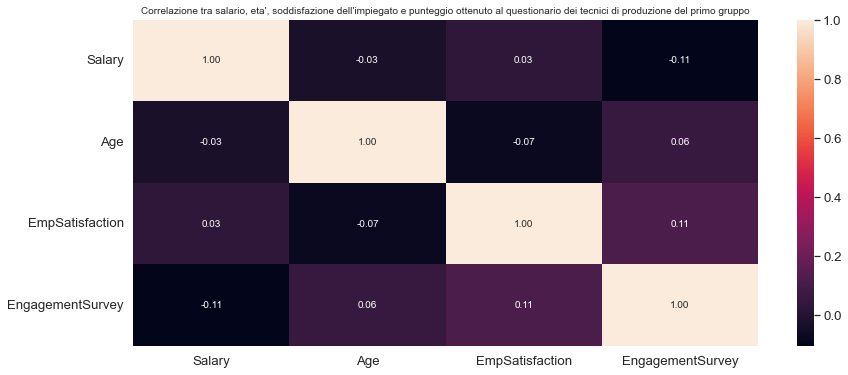

In [113]:
df2 = df_onlyworking[["Salary", "Age", "EmpSatisfaction","EngagementSurvey", "Position"]]
pd1 = df2[df['Position']=='Production Technician I']
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(pd1.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del primo gruppo")
plt.show()

##### **_<a id='G15.2'></a><font color='gold'>Grafico 15.2: Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del secondo gruppo</font>_**

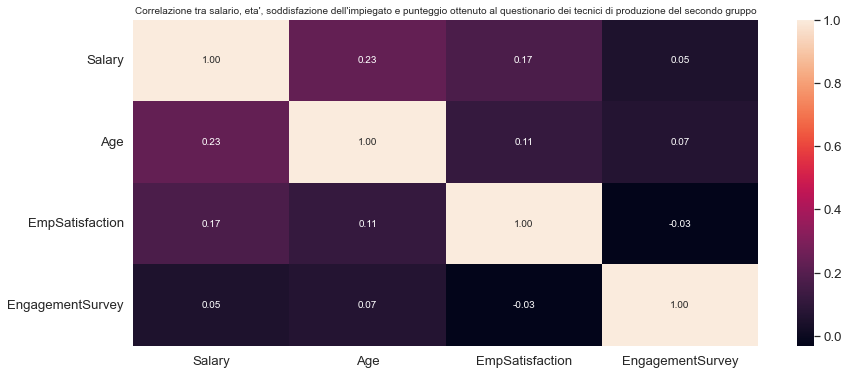

In [114]:
df2 = df_onlyworking[["Salary", "Age", "EmpSatisfaction","EngagementSurvey", "Position"]]
pd2 = df2[df['Position']=='Production Technician II']
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(pd2.corr('kendall'), annot=True, fmt=".2f")
plt.title("Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei tecnici di produzione del secondo gruppo")
plt.show()

##### **_<a id='G15.3'></a><font color='gold'>Grafico 15.3: Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager dell'area vendite</font>_**

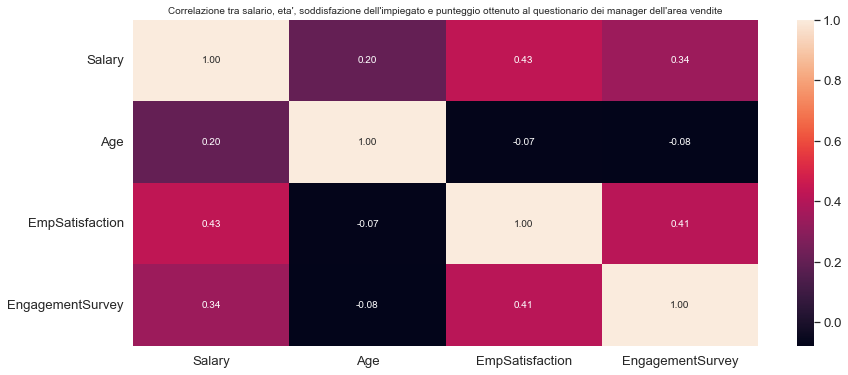

In [115]:
df2 = df_onlyworking[["Salary", "Age", "EmpSatisfaction","EngagementSurvey", "Position"]]
asm = df2[df['Position']=='Area Sales Manager']
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(asm.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager dell'area vendite")
plt.show()

##### **_<a id='G15.4'></a><font color='gold'>Grafico 15.4: Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager di produzione</font>_**

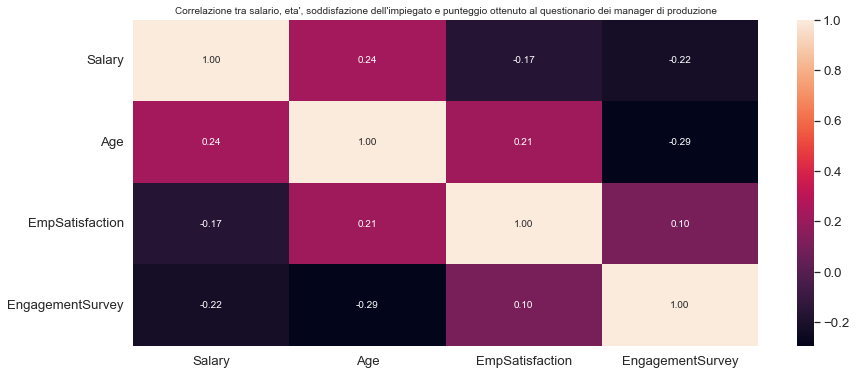

In [116]:
df2 = df_onlyworking[["Salary", "Age", "EmpSatisfaction","EngagementSurvey", "Position"]]
pm = df2[df['Position']=='Production Manager']
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(pm.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario dei manager di produzione")
plt.show()

##### **_<a id='G15.5'></a><font color='gold'>Grafico 15.5: Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario degli ingegneri software</font>_**

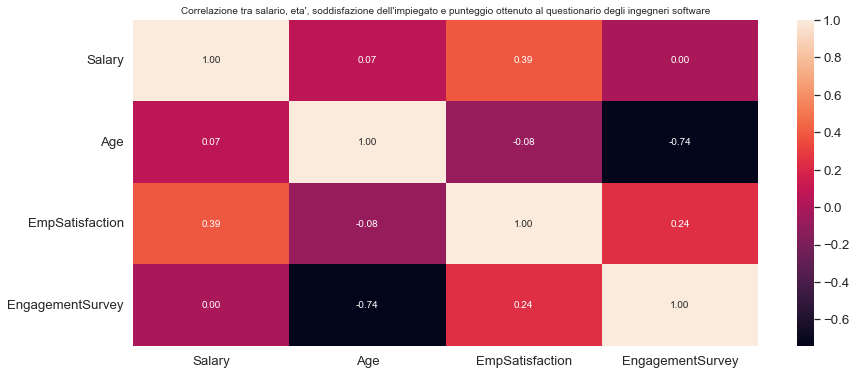

In [117]:
df2 = df_onlyworking[["Salary", "Age", "EmpSatisfaction","EngagementSurvey", "Position"]]
swe = df2[df['Position']=='Software Engineer']
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(swe.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazione tra salario, eta', soddisfazione dell'impiegato e punteggio ottenuto al questionario degli ingegneri software")
plt.show()

#### **_<a id="quartili"></a><font color='gold'>Quartili e Outliers</font>_**
Di seguito creiamo, relativamente alle variiabili numeriche, dei dataset in cui sono stati rimossi gli outliers. Su questi dataset (confrontati con quelli aventi gli outliers) calcoliamo quartili e IQR.

In [118]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def quartili_fence_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    d = {}
    d["q1"] = [q1]
    d["q3"] = [q3]
    d["iqr"] = [iqr]
    d["fence_low"] = [fence_low]
    d["fence_high"] = [fence_high]
    return d


##### **_<a id='S1'></a><font color='yellow'>Salario </br> Differnza Interquartili, IQR</font>_** 

In [119]:
d_Salary = quartili_fence_iqr(df, "Salary")
d_Salary_no_out = quartili_fence_iqr(remove_outlier(df, "Salary"), "Salary")
df_S = pd.DataFrame(data=d_Salary)
df_SNO = pd.DataFrame(data=d_Salary_no_out)

In [120]:
print("Outlier compresi")
df_S

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,55501.5,72036.0,16534.5,30699.75,96837.75


In [121]:
print("Senza Outliers")
df_SNO

Senza Outliers


,q1,q3,iqr,fence_low,fence_high
0,54381.25,67221.75,12840.5,35120.5,86482.5


##### **_<a id='A1'></a><font color='yellow'>Age </br> Differnza Interquartili, IQR</font>_** 


In [122]:
d_Age = quartili_fence_iqr(df, "Age")
d_Age_no_out = quartili_fence_iqr(remove_outlier(df, "Age"), "Age")
df_A = pd.DataFrame(data=d_Age)
df_ANO = pd.DataFrame(data=d_Age_no_out)

In [123]:
print("Outlier compresi")
df_A

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,36.0,49.0,13.0,16.5,68.5


In [124]:
print("Senza Outlier")
df_ANO

Senza Outlier


,q1,q3,iqr,fence_low,fence_high
0,36.0,48.0,12.0,18.0,66.0


##### **_<a id='H1'></a><font color='yellow'>Age of Hire </br> Differnza Interquartili, IQR</font>_** 

In [125]:
d_AgeHire = quartili_fence_iqr(df, "AgeofHire")
d_AgeHire_no_out = quartili_fence_iqr(remove_outlier(df, "AgeofHire"), "AgeofHire")
df_AH = pd.DataFrame(data=d_AgeHire)
df_AHNO = pd.DataFrame(data=d_Age_no_out)

In [126]:
print("Outlier compresi")
df_AH

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,28.0,39.0,11.0,11.5,55.5


In [127]:
print("Senza outlier")
df_AHNO

Senza outlier


,q1,q3,iqr,fence_low,fence_high
0,36.0,48.0,12.0,18.0,66.0


##### **_<a id='T1'></a><font color='yellow'>Age of Term </br> Differnza Interquartili, IQR</font>_** 

In [128]:
d_AgeTerm = quartili_fence_iqr(df, "AgeTerm")
d_AgeTerm_no_out = quartili_fence_iqr(remove_outlier(df, "AgeTerm"), "AgeTerm")
df_AT = pd.DataFrame(data=d_AgeTerm)
df_ATNO = pd.DataFrame(data=d_AgeTerm_no_out)

In [129]:
print("Outlier compresi")
df_AT

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,29.75,43.25,13.5,9.5,63.5


In [130]:
print("Senza Outlier")
df_ATNO

Senza Outlier


,q1,q3,iqr,fence_low,fence_high
0,29.25,43.0,13.75,8.625,63.625


##### **_<a id='AB1'></a><font color='yellow'>Assenze </br> Differnza Interquartili, IQR</font>_** 

In [131]:
d_Absences = quartili_fence_iqr(df, "Absences")
d_Absences_no_out = quartili_fence_iqr(remove_outlier(df, "Absences"), "Absences")
df_AB = pd.DataFrame(data=d_Absences)
df_ABNO = pd.DataFrame(data=d_Absences_no_out)

In [132]:
print("Outlier compresi")
df_AB

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,5.0,15.0,10.0,-10.0,30.0


In [133]:
print("Senza outlier")
df_ABNO

Senza outlier


,q1,q3,iqr,fence_low,fence_high
0,5.0,15.0,10.0,-10.0,30.0


##### **_<a id='E1'></a><font color='yellow'>Enggement Survey </br> Differnza Interquartili, IQR</font>_** 

In [134]:
d_Survey = quartili_fence_iqr(df, "EngagementSurvey")
d_Survey_no_out = quartili_fence_iqr(remove_outlier(df, "EngagementSurvey"), "EngagementSurvey")
df_SU = pd.DataFrame(data=d_Survey)
df_SUNO = pd.DataFrame(data=d_Survey_no_out)

In [135]:
print("Outlier compresi")
df_SU

Outlier compresi


,q1,q3,iqr,fence_low,fence_high
0,3.69,4.7,1.01,2.175,6.215


In [136]:
print("Senza outlier")
df_SUNO

Senza outlier


,q1,q3,iqr,fence_low,fence_high
0,3.735,4.7,0.965,2.2875,6.1475


#### **_<a id="kurtosis"></a><font color='gold'>Calcolo di indici Skweness e Kurtosis</font>_**

In questa sezione si analizza l'andamento delle distribuzioni. In particolare, testiamo la normalità della curva per specifiche variabili tenendo in considerazione il numero di outlier. Se il numero di outlier all'interno di una colonna dovesse superare il 15%, questi verranno rimossi per il calcolo. Per ogni variabile presa in esame viene mostrata la visualizzazione della distribuzione.

In [137]:
#con il parametro mod viene specificata la modalità di return della fn 
def count_outliers(df_in, colname, mod):
    q1 = df_in[colname].quantile(0.25)
    q3 = df_in[colname].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    new = df_in[(df_in[colname] < fence_low) | (df_in[colname] > fence_high)].count()
    out_num = new[colname]
    if mod==0:
        return out_num
    if mod==1:
        return out_num*100/df_in[colname].count()

In [138]:
#funzioni che calcolano kurtosis e skewness, tenendo in considerazione il numero di outliers
def compute_kurt(df, colname, outliers):
    if outliers<=15:
        return round(df[colname].kurt(), 2)
    else:
        return round(remove_outlier(df, colname[colname]).kurt(), 2)

def compute_skew(df, colname, outliers):
    if outliers<=15:
        return round(df[colname].skew(), 2)
    else:
        return round(remove_outlier(df, colname[colname]).skew(), 2)

def kurt_skew_table(kurt, skew):
    d = {}
    d["Kurtosis"] = [kurt]
    d["Skewness"] = [skew]
    new_df = pd.DataFrame(data = d)
    return new_df

##### **_<a id='S2'></a><font color='yellow'>Salario </font>_** 

In [139]:
salary_out_perc = count_outliers(df, "Salary", 1)
kurt_salary = compute_kurt(df, "Salary", salary_out_perc)
skew_salary = compute_skew(df, "Salary", salary_out_perc)
kurt_skew_table(kurt_salary, skew_salary)

,Kurtosis,Skewness
0,15.45,3.31


In [140]:
df['Salary'].iplot(
    kind='hist',
    bins=30,
    xTitle='Salario',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Salary Distribution')

##### **_<a id='A2'></a><font color='yellow'>Age </font>_** 

In [141]:
age_out_perc = count_outliers(df_onlyworking, "Age", 1)
kurt_age = compute_kurt(df_onlyworking, "Age", age_out_perc)
skew_age = compute_skew(df_onlyworking, "Age", age_out_perc)
kurt_skew_table(kurt_age, skew_age)

,Kurtosis,Skewness
0,0.57,0.91


In [142]:
df['Age'].iplot(
    kind='hist',
    bins=10,
    xTitle='Età',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Age Distribution')

##### **_<a id='H2'></a><font color='yellow'>Age of Hire </font>_** 

In [143]:
agehire_out_perc = count_outliers(df, "AgeofHire", 1)
kurt_agehire = compute_kurt(df, "AgeofHire", agehire_out_perc)
skew_agehire = compute_skew(df, "AgeofHire", agehire_out_perc)
kurt_skew_table(kurt_agehire, skew_agehire)

,Kurtosis,Skewness
0,0.54,0.89


In [144]:
df['AgeofHire'].iplot(
    kind='hist',
    bins=30,
    xTitle='Età di assunzione',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Age of Hire Distribution')

##### **_<a id='T2'></a><font color='yellow'>Age of Term </font>_** 

In [145]:
ageterm_out_perc = count_outliers(df_noworking, "AgeTerm", 1)
kurt_ageterm = compute_kurt(df_noworking, "AgeTerm", ageterm_out_perc)
skew_ageterm = compute_skew(df_noworking, "AgeTerm", ageterm_out_perc)
kurt_skew_table(kurt_ageterm, skew_ageterm)

,Kurtosis,Skewness
0,0.28,0.87


In [146]:
df['AgeTerm'].iplot(
    kind='hist',
    bins=30,
    xTitle='Età al momento del licenziamento',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Age of Termination Distribution')

##### **_<a id='AB2'></a><font color='yellow'>Assenze </font>_** 

In [147]:
assenze_out_perc = count_outliers(df, "Absences", 1)
kurt_assenze = compute_kurt(df, "Absences", assenze_out_perc)
skew_assenze = compute_skew(df, "Absences", assenze_out_perc)
kurt_skew_table(kurt_assenze, skew_assenze)

,Kurtosis,Skewness
0,-1.3,0.03


In [148]:
df['Absences'].iplot(
    kind='hist',
    bins=30,
    xTitle='Numero di assenze',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Absences Distribution')

##### **_<a id='E2'></a><font color='yellow'>Engagement Survey </font>_** 

In [149]:
survey_out_perc = count_outliers(df, "EngagementSurvey", 1)
kurt_survey = compute_kurt(df, "EngagementSurvey", survey_out_perc)
skew_survey = compute_skew(df, "EngagementSurvey", survey_out_perc)
kurt_skew_table(kurt_survey, skew_survey)

,Kurtosis,Skewness
0,1.16,-1.12


In [150]:
df['EngagementSurvey'].iplot(
    kind='hist',
    bins=30,
    xTitle='Engagement Survey points',
    linecolor='black',
    yTitle='Numero di dipendenti',
    title='Engagement Survey Distribution')

#### **_<a id="corr2"></a><font color='gold'>Indici di correlazione di Pearson, Spearman, Kendall</font>_**

##### **_<a id='pearson'></a><font color='yellow'>Correlazione di Pearson </font>_** 

In [151]:
dfNum.corr()

,Salary,Age,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,SpecialProjectsCount,AgeTerm,AgeofHire
Salary,1.000000,0.094360,0.062718,0.064966,0.082382,-0.069443,0.508333,0.069028,0.124498
Age,0.094360,1.000000,-0.065241,0.063384,-0.039471,-0.053286,-0.090207,0.980876,0.975796
EmpSatisfaction,0.062718,-0.065241,1.000000,0.187105,0.075222,-0.235412,0.033877,-0.033218,-0.063188
EngagementSurvey,0.064966,0.063384,0.187105,1.000000,-0.008771,-0.585232,0.013227,0.100420,0.057573
Absences,0.082382,-0.039471,0.075222,-0.008771,1.000000,0.001833,-0.020452,-0.082780,-0.054188
DaysLateLast30,-0.069443,-0.053286,-0.235412,-0.585232,0.001833,1.000000,-0.092494,-0.148088,-0.058006
SpecialProjectsCount,0.508333,-0.090207,0.033877,0.013227,-0.020452,-0.092494,1.000000,-0.040741,-0.005479
AgeTerm,0.069028,0.980876,-0.033218,0.100420,-0.082780,-0.148088,-0.040741,1.000000,0.979593
AgeofHire,0.124498,0.975796,-0.063188,0.057573,-0.054188,-0.058006,-0.005479,0.979593,1.000000


##### **_<a id='spearman'></a><font color='yellow'>Correlazione di Spearman </font>_** 

In [152]:
dfNum.corr("spearman")

,Salary,Age,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,SpecialProjectsCount,AgeTerm,AgeofHire
Salary,1.000000,0.016838,0.040271,0.031117,0.079194,-0.066890,0.506866,0.003070,0.068585
Age,0.016838,1.000000,-0.057629,0.044802,-0.023349,-0.048690,-0.105184,0.969694,0.963038
EmpSatisfaction,0.040271,-0.057629,1.000000,0.124273,0.073698,-0.208183,0.011738,-0.018589,-0.058402
EngagementSurvey,0.031117,0.044802,0.124273,1.000000,-0.006484,-0.426366,0.021082,0.046344,0.043293
Absences,0.079194,-0.023349,0.073698,-0.006484,1.000000,-0.003041,-0.022693,-0.026627,-0.044665
DaysLateLast30,-0.066890,-0.048690,-0.208183,-0.426366,-0.003041,1.000000,-0.072020,-0.090373,-0.052332
SpecialProjectsCount,0.506866,-0.105184,0.011738,0.021082,-0.022693,-0.072020,1.000000,-0.066491,-0.007273
AgeTerm,0.003070,0.969694,-0.018589,0.046344,-0.026627,-0.090373,-0.066491,1.000000,0.966692
AgeofHire,0.068585,0.963038,-0.058402,0.043293,-0.044665,-0.052332,-0.007273,0.966692,1.000000


##### **_<a id='kendall'></a><font color='yellow'>Correlazione di Kendall </font>_** 

In [153]:
dfNum.corr("kendall")

,Salary,Age,EmpSatisfaction,EngagementSurvey,Absences,DaysLateLast30,SpecialProjectsCount,AgeTerm,AgeofHire
Salary,1.000000,0.011926,0.030117,0.021360,0.053300,-0.053932,0.393345,0.001705,0.045308
Age,0.011926,1.000000,-0.045459,0.030435,-0.014780,-0.039960,-0.083957,0.875579,0.865595
EmpSatisfaction,0.030117,-0.045459,1.000000,0.098420,0.058468,-0.189672,0.010048,-0.016384,-0.046153
EngagementSurvey,0.021360,0.030435,0.098420,1.000000,-0.005388,-0.349876,0.016251,0.028753,0.030022
Absences,0.053300,-0.014780,0.058468,-0.005388,1.000000,-0.002432,-0.018979,-0.020003,-0.031228
DaysLateLast30,-0.053932,-0.039960,-0.189672,-0.349876,-0.002432,1.000000,-0.067538,-0.073248,-0.042122
SpecialProjectsCount,0.393345,-0.083957,0.010048,0.016251,-0.018979,-0.067538,1.000000,-0.054092,-0.005821
AgeTerm,0.001705,0.875579,-0.016384,0.028753,-0.020003,-0.073248,-0.054092,1.000000,0.871424
AgeofHire,0.045308,0.865595,-0.046153,0.030022,-0.031228,-0.042122,-0.005821,0.871424,1.000000


Considerando la quantità di outliers rilevati e la mancata presenza di distribuzioni normali (nonostante le distribuzioni di Age e AgeOfHire ci si avvicinino) all'interno del dataset, l'indice di correlazione più affidabile è quello di Kendall.
Se osserviamo la tabella con le correlazioni, possiamo identificare, come ci si può facilmente aspettare, un'alta correlazione soltanto tra le variabili che indicano l'età e l'età di cessazione/età di assunzione; in quanto si tratta di dati derivati dalla medesima colonna. Per quanto riguarda le altre variabili non sono state rilevate correlazioni significative. 

---

### **_<a id="extra"></a><font color='orange'>Sezione Altro - Extra</font>_**
Questa ulteriore sezione mostra gli ultimi tre grafici che, nonostante non fossero direttamente legati alle principali domande poste in introduzione , ci sono sembrati interessanti da mostrare nella relazione. 
In primis ci siamo chiesti se lo stato civile potesse in qualche modo influenzare il numero delle assenze dal luogo di lavoro. 
Nel grafico 17, sempre relativamente alle assenze, abbiamo analizzato se vi fosse un rapporto tra queste e il sesso dell'impiegato. Questo avrebbe potuto aprire ad un'interessante analisi di questo dato rispetto allo stato di genitorialità degli impiegati; purtroppo però nel dataset non sono presenti queste informazioni. 
Infine, abbiamo cercato di capire se vi fosse una relazione tra la motivazione della cessazione del contratto e l'età dell'impiegato.

#### **_<a id='G16'></a><font color='gold'>Grafico 16: Rapporto tra assenze e stato civile</font>_**

Nel successivo barplot è stato evidenziato il numero di *assenze medio* in base allo stato civile. Nonostante non si presenti un'eccessiva differenza nel numero di assenze è interessante evidenziare come gli impiegati facenti parte della categoria *separati* abbiano in media accumulato meno assenze rispetto agli altri.

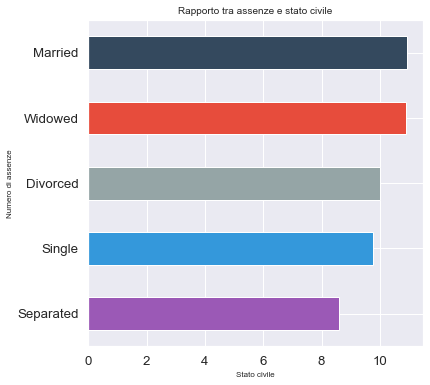

In [154]:
marital=df[["MaritalDesc", "Absences"]]
mgb=marital.groupby("MaritalDesc")["Absences"]
media_assenze = mgb.mean()
plt.rcParams["figure.figsize"] = [6,6]
media_assenze.head(4)
media_assenze= media_assenze.sort_values( ascending=True)
media_assenze.plot(x="MaritalDesc", y = "Absences", kind="barh", color=flatui)
plt.title("Rapporto tra assenze e stato civile")
plt.xlabel("Stato civile")
plt.ylabel("Numero di assenze")
plt.show()

#### **_<a id='G17'></a><font color='gold'>Grafico 17: Numero di assenze specifiche per uomini e donne, per ogni dipartimento</font>_**

In questo grafico effettuiamo un confronto tra le assenze di ogni impiegato e il dipartimento lavorativo. Nella maggior parte dei dipartimenti gli uomini fanno meno assenze delle donne, ad eccezione di quelli del dipartimento *Admin Offices* che hanno una media di quasi 11 assenze rispetto alle circa 8 delle donne. Anche in questo grafico, come nel [grafico 10](#G10), si conferma l'assenza di uomini nella categoria "Executive Office". La CEO dell'azienda ha una media di 10 assenze.

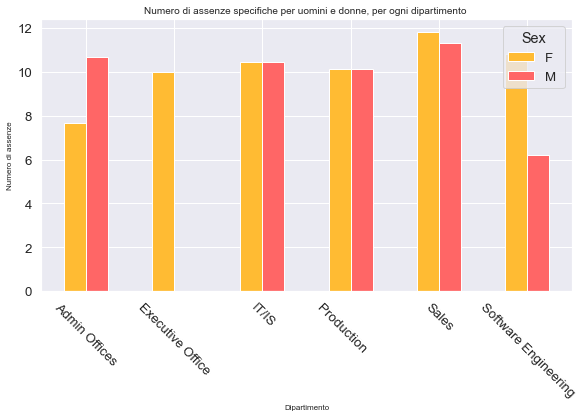

In [155]:
demostack=pd.crosstab(df['Department'], df['Sex'],values=df['Absences'],aggfunc=np.average)
flatui = ["#ffbb33", "#ff6666"]
plt.rcParams["figure.figsize"] = [9.5,5]
sns.set_style("darkgrid")
demostack.plot(kind="bar", stacked=False,color=flatui)
plt.title('Numero di assenze specifiche per uomini e donne, per ogni dipartimento ')
plt.ylabel('Numero di assenze')
plt.xlabel('Dipartimento')
plt.xticks(rotation=-45)
plt.show()

#### **_<a id='G18'></a><font color='gold'>Grafico 18: Rapporto tra motivazione della fine del contratto ed eta'</font>_**
Nel seguente grafico possiamo osservare dei boxplot che rappresentano le distribuzioni della variabile "età" organizzati in base ai diversi motivi di cessazione del contratto di lavoro. Tra le distribuzioni più interessanti possiamo osservare il box plot creato per la motivazione *maternity leave*, in cui notiamo che i valori si concentrano in un'età molto giovane che non va oltre i trenta. 

Motivazione di fine contratto | Numero di impiegati
:-------------------------|------------:
N/A-StillEmployed|207
Another position|20
unhappy|14
more money|11
career change|9
hours|8
attendance|7
return to school|5
relocation out of area|5
no-call, no-show|4
military|4
retiring|4
performance|4
maternity leave - did not return|3
medical issues|3
Learned that he is a gangster|1
Fatal attraction|1
gross misconduct|1


In [156]:
xzulu=py.box(df, x='AgeTerm', y='TermReason', title = "Rapporto tra motivazione della fine del contratto ed eta'", color="TermReason" , labels={
    "AgeTerm":"Età di fine contratto",
    "TermReason":"Motivazione di fine contratto"
})
xzulu.update_layout(font=dict(
        family="Helvetica, monospace",
        size=18,
        color="RebeccaPurple"
    ),     title_font_color="red",height=800, legend_title_font_color="green")
xzulu.show()

----

### **_<a id="nan"></a><font color='orange'>Sezione Gestione dei NaN</font>_**
Visto e considerato che gli unici dati non numerici erano presenti nella colonna "DateofTermination", abbiamo sostuito queste occorrenze con "Still Employed", poichè così come riportato su Kaggle i dati NaN erano riferiti a quegli impiegati ancora in esercizio

In [157]:
#df.DateofTermination = df.DateofTermination.fillna('Still_Employed', inplace=True)
df.DateofTermination = df.DateofTermination.fillna('Still_Employed')
df.AgeTerm = df.AgeTerm.fillna('Still_Employed')

### **_<a id="conclusioni"></a><font color='orange'>Conclusioni</font>_**
L'analisi di questo dataset ci ha permesso di giungere alle seguenti conclusioni:

- il salario dei dipendenti corrisponde con la posizione nell'organigramma aziendale

- le persone con gli stipendi più alti non eseguono un gran numero di progetti speciali

- vi un forte rendimento presente nell'azienda nonostante il numero di assenze che ammonta a un minimo di 10 ore

- la maggioranza dei dipendenti sono donne e il CEO è una donna 

- la maggior parte dei dipendenti hanno situazioni familiari stabili e sono impegnati

- quasi tutti i dipendenti sono stati assunti attraverso piattaforme online (Indeed, LinkedIn, etc.)

- non vi è una forte relazione tra la piattaforma di assunzione e il punteggio di rendimento del dipendente

- a fronte del calcolo degli indici di correlazione si può affermare che non vi sono correlazioni significative (in quanto nessuno dei valori presenti nelle tabelle sopraripotate si avvicina abbastanza a +1 o -1)

- riguardo i dati quantitativi analizzati si può altresì affermare che non vi sono distribuzioni normali dei valori





### **_<a id="changelog"></a><font color='orange'>ChangeLog</font>_**

 Negli elenchi seguenti si riportano modifiche e aggiunte rispetto alla precedente versione del progetto 

 #### Modifiche

- grafico 3 (stile)

- grafico 4 (stile)

- grafico 8 (trasformazione in grafico interattivo)

- grafico 9 (trasformazione in grafico interattivo)

- grafico 10 (trasformazione in grafico interattivo)

- grafico 12->13 (trasformazione in grafico interattivo)

- grafico 13->14 (trasformazione in grafico interattivo)

- grafici 14.1->15.1, 14.2->15.2, 14.3->15.3, 14.4->15.4, 14.5->15.5 (cambio dell'indice di correlazione nelle heatmap: Pearson->Kendall)

- grafico 15->16 (stile)

- grafico 17->18 (trasformazione in grafico interattivo)




#### Aggiunte

- sezione con statistiche descrittive sulle variabili numeriche del dataset

- grafico 12: bubbleplot sul rapporto tra salario, assenze e progetti speciali in base all'età

- grafico 15: heatmap su variabili numeriche

- sottosezione *quartili e outliers*

- sottosezione *kurtosis e skewness* con visualizzazione delle distribuzioni

- sottosezione con i tre indici di correlazione per il rapporto tra ciascuna variabile numerica nel dataset

- sezione *gestione dei NaN*

- aggiunta conclusioni


